Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,mean_squared_error
from sklearn.decomposition import PCA

In [2]:
def plot_data(X,y,ax,title):
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, s = 30, edgecolor=(0,0,0,0.5))
    ax.set_ylabel('Principle Component 1')
    ax.set_xlabel('Principle Component 2')
    if title is not None:
        ax.set_title(title)

In [3]:
def reShapeArray(original_array,new_size):
    new_array = np.empty(new_size) 
    new_array.fill(None)
    new_array[:original_array.size] = original_array
    return new_array

In [4]:
def add_to_csv(label_old,label_new,x_train,name):
    size = max(label_old.size,x_train.shape[0])
    label_old = reShapeArray(label_old,size)
    label_new = reShapeArray(label_new,size)
    data = {
        'Predicted labels before feature engineering': label_old,
        'Predicted labels after feature engineering': label_new,
        'No of new features': [x_train.shape[1]]*(size)
    }
    df = pd.DataFrame(data)
    for i in range(x_train.shape[1]):
        new_feature_name = f'new_feature_{i + 1}'
        df[new_feature_name] = x_train[:, i]
    df.to_csv(name, index=False)
    return df
    

In [5]:
!pip install -U imbalanced-learn

Import dataset

In [6]:
# Read column names from file
cols = list(pd.read_csv("train.csv", nrows=1))

Label 1 classification without feature selection

In [7]:
# Use list comprehension to remove the unwanted column in **usecol**
train_data= pd.read_csv("train.csv", usecols =[i for i in cols if i not in ["label_2", "label_3", "label_4"]])
train_data = train_data.dropna()
train_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,1.007398,-0.317517,-0.148447,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-1.559120,-1.369495,-1.253272,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.136551,-2.210191,-1.463330,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,-0.718073,-2.546477,-2.172275,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.739541,-1.097638,-0.574205,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45


In [8]:
test_data= pd.read_csv("valid.csv", usecols =[i for i in cols if i not in ["label_2", "label_3", "label_4"]])
test_data = test_data.dropna()
test_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1
0,-1.153148,-1.038098,1.419872,2.734152,1.154604,-1.086937,-0.516225,-1.370325,2.865359,-1.879877,...,-1.061046,0.382224,0.076990,-0.719046,-1.248530,0.144460,-3.240056,0.052614,0.083108,45
1,-1.377524,-1.018393,1.102352,2.849025,0.440302,-1.149039,-0.789796,-2.258196,1.264268,-2.123730,...,0.120304,-0.066218,-0.231481,-1.383339,-0.787736,1.044895,-2.289637,0.199752,-0.712154,45
2,0.889574,-2.743300,-0.320194,3.047766,-0.923335,1.741686,-0.615148,0.756482,2.074775,-1.433126,...,-1.166126,-1.299070,-2.486144,1.178322,0.035333,0.857712,-1.928684,0.639870,-0.268576,45
3,-1.527213,-1.133121,0.385927,3.129767,0.229020,1.373105,0.919284,-0.755558,1.086973,-2.440614,...,-1.663985,-0.865878,-1.387906,-0.664176,0.805059,0.975368,-2.700269,1.523236,-1.259052,45
4,0.948176,-0.750248,0.008329,1.675338,1.941155,-0.783623,-0.485584,-0.261882,2.875204,-1.473030,...,0.061812,-0.368456,0.344975,-0.665200,-0.428060,-0.393100,-1.854657,2.207063,-0.342725,45


In [9]:
test_data_= pd.read_csv("test.csv", usecols =[i for i in cols if i not in ["label_1","label_2", "label_3", "label_4"]])
test_data_ = test_data_.dropna()
X1_test_ = test_data_.iloc[:,:]

In [10]:
#features
X1_train = train_data.iloc[:,:-1]
Y1_train = train_data.iloc[:,-1]
X1_test = test_data.iloc[:,:-1]
Y1_test = test_data.iloc[:,-1]

Laabel1 Using Random Forest without Feature Engineering

In [11]:
rf = RandomForestClassifier()
rf.fit(X1_train, Y1_train)

RandomForestClassifier()

In [12]:
Y1_pred_rf = rf.predict(X1_test)
print(classification_report(Y1_test, Y1_pred_rf))

              precision    recall  f1-score   support

           1       1.00      0.85      0.92        13
           2       1.00      0.89      0.94         9
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00        17
           8       1.00      1.00      1.00        14
           9       1.00      1.00      1.00        11
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95        19
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00        11
          14       0.87      0.87      0.87        15
          15       1.00      1.00      1.00        17
          16       0.88      1.00      0.93        14
          17       1.00      0.93      0.96        14
          18       1.00    

In [13]:
Y1_pred_rf_ = rf.predict(X1_test_)

Feature Engineering for Label_1

Diamensionality Reduction

In [14]:
#Observe correlation between features
X1_train.corr()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256
feature_1,1.000000,-0.122368,-0.043844,0.133359,0.085920,0.143903,0.028939,-0.141357,0.049066,0.180607,...,-0.105048,-0.057641,-0.052484,-0.132177,0.080079,-0.293291,-0.130838,0.213589,-0.029109,-0.046556
feature_2,-0.122368,1.000000,-0.315640,-0.038636,-0.066823,0.014991,0.001485,-0.069789,-0.177971,-0.229639,...,0.011812,0.001762,0.162572,0.052741,-0.097919,0.145376,0.227251,0.142215,0.186345,-0.146253
feature_3,-0.043844,-0.315640,1.000000,0.019540,-0.024949,-0.042450,0.107391,-0.004427,0.133795,0.043577,...,0.039956,-0.030585,-0.196724,0.127026,0.039028,-0.032455,-0.095846,-0.044789,-0.191170,0.045783
feature_4,0.133359,-0.038636,0.019540,1.000000,0.164739,0.342170,-0.033977,-0.120289,0.162836,-0.096058,...,0.110797,0.001961,-0.246270,-0.227987,0.239254,-0.263488,0.018143,0.339311,-0.043473,-0.310500
feature_5,0.085920,-0.066823,-0.024949,0.164739,1.000000,0.165496,-0.277043,-0.086430,0.098080,0.094618,...,-0.158222,-0.093759,-0.205398,0.169982,0.124504,0.046793,0.000250,0.366209,0.250435,0.078442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_252,-0.293291,0.145376,-0.032455,-0.263488,0.046793,0.083610,-0.105217,0.111556,0.021658,-0.135744,...,-0.291179,-0.058649,-0.050666,0.174844,-0.200496,1.000000,0.207554,-0.132150,0.173118,0.401299
feature_253,-0.130838,0.227251,-0.095846,0.018143,0.000250,0.104036,0.169003,0.177270,-0.219734,-0.211072,...,-0.289260,-0.190506,0.017967,0.093282,0.156962,0.207554,1.000000,0.169700,0.031999,-0.146592
feature_254,0.213589,0.142215,-0.044789,0.339311,0.366209,0.244566,-0.191455,0.005285,0.095907,0.091993,...,-0.352404,-0.138879,-0.178728,-0.259972,0.314718,-0.132150,0.169700,1.000000,-0.007740,-0.262347
feature_255,-0.029109,0.186345,-0.191170,-0.043473,0.250435,0.153653,-0.215283,0.025924,-0.093347,-0.103102,...,-0.014113,0.042190,0.107745,0.147976,-0.302310,0.173118,0.031999,-0.007740,1.000000,0.179979


In [15]:
pca = PCA(0.98)
pca = pca.fit(X1_train)

X1_train_pca = pca.transform(X1_train)
X1_test_pca = pca.transform(X1_test)
X1_test_pca_ = pca.transform(X1_test_)
X1_train_pca.shape

(28520, 88)

Data Preprocessing

<Axes: title={'center': 'Count of Label_1'}>

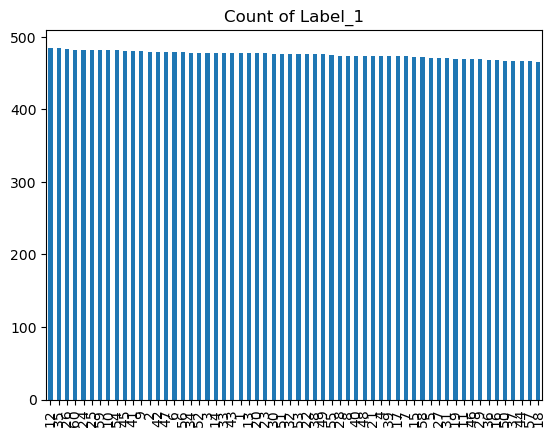

In [16]:
train_data['label_1'].value_counts().plot(kind='bar',title='Count of Label_1')

There is no bias in the dataset. Furthermore, data normalization is not need for random forest model

Using Random Forest

In [17]:
rf = RandomForestClassifier()
rf.fit(X1_train_pca, Y1_train)
Y1_pred_rf = rf.predict(X1_test_pca)

In [18]:
importance = rf.feature_importances_
columns_to_delete = []
for i,v in enumerate(importance):
    if v < 0.008:
        columns_to_delete.append(i)   
train_reduced = np.delete(X1_train_pca, columns_to_delete, axis=1)
test_reduced = np.delete(X1_test_pca, columns_to_delete, axis=1)
test_reduced_ = np.delete(X1_test_pca_, columns_to_delete, axis=1)
train_reduced.shape

(28520, 67)

In [19]:
rf = RandomForestClassifier()
rf.fit(train_reduced, Y1_train)
Y1_pred = rf.predict(test_reduced)
print(classification_report(Y1_test, Y1_pred))

              precision    recall  f1-score   support

           1       1.00      0.77      0.87        13
           2       1.00      0.89      0.94         9
           3       0.92      1.00      0.96        12
           4       0.89      1.00      0.94        16
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00        17
           8       0.93      1.00      0.97        14
           9       1.00      1.00      1.00        11
          10       0.80      1.00      0.89         8
          11       0.95      1.00      0.97        19
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00        11
          14       0.93      0.87      0.90        15
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
          17       1.00      0.93      0.96        14
          18       0.89    

In [20]:
Y1_pred_ = rf.predict(test_reduced_)

In [21]:
add_to_csv(Y1_pred_rf_,Y1_pred_,test_reduced_,'190116U_label_1.csv').head()

,Predicted labels before feature engineering,Predicted labels after feature engineering,No of new features,new_feature_1,new_feature_2,new_feature_3,new_feature_4,new_feature_5,new_feature_6,new_feature_7,...,new_feature_58,new_feature_59,new_feature_60,new_feature_61,new_feature_62,new_feature_63,new_feature_64,new_feature_65,new_feature_66,new_feature_67
0,45.0,45.0,67,-2.127144,-7.598202,-4.396460,-6.646038,3.014192,-3.112589,4.888551,...,-1.954934,-0.379580,0.652135,-0.384177,2.064405,0.427987,0.475146,0.669706,-1.414591,0.502098
1,45.0,45.0,67,-8.119003,-9.828140,0.191861,-7.562776,10.678703,1.089658,-2.260067,...,0.310537,-1.039074,-0.133683,-2.189247,-0.885390,0.258179,-0.047492,0.431357,-1.207775,0.083258
2,45.0,45.0,67,-5.751535,-4.397810,-0.092524,-4.446784,4.298898,3.097758,-0.101781,...,-0.262501,-0.898937,-0.166480,-0.829002,-0.332213,0.008407,-0.334244,0.636108,-0.327151,-0.323116
3,45.0,45.0,67,-2.960283,-7.226763,-0.797357,3.202733,4.425670,-1.954743,-1.318623,...,-1.003328,1.037151,-1.165187,0.762492,-1.614969,-0.203191,0.253412,0.864696,-1.151327,-1.426834
4,45.0,45.0,67,0.440296,-7.139061,1.913627,-4.046085,3.593655,0.181699,2.931932,...,0.469910,0.104062,0.435867,-0.800653,-1.440968,0.091516,0.094910,-0.302238,-1.176357,-0.717744


Label 2 prediction without feature selection

In [22]:
#install xgboost
!pip install xgboost

In [23]:
import xgboost as xgb

In [24]:
# Use list comprehension to remove the unwanted column in **usecol**
train_data= pd.read_csv("train.csv", usecols =[i for i in cols if i not in ["label_1", "label_3", "label_4"]])
train_data = train_data.dropna()
train_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_2
480,-2.133907,-1.851185,-0.401913,0.579630,0.701037,-0.212690,-0.708243,3.016801,0.464313,-0.825300,...,-1.325403,0.563739,-0.180270,-0.598476,2.794869,1.049926,-2.829166,0.908335,-1.295668,25.0
481,-0.404385,-0.836757,0.762689,1.637213,0.665621,0.625971,0.262635,1.408128,0.776417,-2.443906,...,-0.435936,-0.216273,-1.313571,1.234601,0.764250,1.848260,-1.138066,-0.143287,-1.997515,25.0
482,-1.642496,-1.278682,0.164281,1.371167,0.258172,-0.896479,-0.051402,0.623235,0.367427,-1.211149,...,-0.044023,1.547585,-0.239684,0.269733,1.143640,1.827864,-2.056184,-0.070624,-2.222077,25.0
483,-0.191927,-2.451684,0.547922,-0.041680,0.804643,-0.324783,0.806728,1.507769,-0.657439,-0.784736,...,-0.702702,0.617131,-0.730333,1.085195,-1.203888,2.832388,-1.943990,0.208316,-2.421425,25.0
484,-0.510969,-0.781623,-1.478504,0.794873,0.354653,0.268014,-1.677308,1.627065,0.985870,-2.165971,...,-1.884749,1.849695,0.071822,-0.820887,1.300054,2.499395,-1.692642,0.563708,-0.975423,25.0


In [25]:
test_data= pd.read_csv("valid.csv", usecols =[i for i in cols if i not in ["label_1", "label_3", "label_4"]])
test_data = test_data.dropna()
test_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_2
14,-0.172181,-2.506089,-0.087602,1.013303,0.838550,-0.172347,-0.543211,1.235440,1.376382,-0.972239,...,-0.489255,0.446155,0.504970,-1.006134,0.184453,0.415477,-1.716953,-0.827742,-2.045459,25.0
15,-0.681202,-1.663909,1.788502,0.857073,0.709822,0.834900,0.039072,1.219533,0.483133,-1.896562,...,-0.350192,0.260784,-0.876141,1.675475,0.322208,1.401139,-1.549360,-1.246808,-1.945575,25.0
16,-1.634366,0.461024,0.615440,1.199882,0.084413,-1.177391,0.557994,0.975045,0.033425,-0.920055,...,0.120623,1.778635,0.175824,-0.532355,0.251711,1.900047,-2.395971,-0.667466,-2.955309,25.0
17,-0.963445,-0.215360,-0.653633,0.456256,0.523190,0.178436,0.157641,0.747167,-0.100809,-2.305725,...,0.023904,1.613809,0.361577,-0.296968,-0.438388,1.488559,-1.781888,0.081912,-2.422592,25.0
18,-0.583766,-1.942095,-0.686590,1.630802,0.921440,0.809160,-0.389961,1.604646,-0.304054,-1.762844,...,-0.330955,1.798214,-0.767588,0.749547,-0.493671,2.532719,-1.705593,1.291160,-2.135860,25.0


In [26]:
test_data_= pd.read_csv("test.csv", usecols =[i for i in cols if i not in ["label_1","label_2", "label_3", "label_4"]])
test_data_ = test_data_.dropna()
X2_test_ = test_data_.iloc[:,:]

In [27]:
#features
X2_train = train_data.iloc[:,:-1]
Y2_train = train_data.iloc[:,-1]
X2_test = test_data.iloc[:,:-1]
Y2_test = test_data.iloc[:,-1]

#Feature Scaling
scaler = StandardScaler()
scaler.fit(X2_train)

X2_train_sca = scaler.transform(X2_train)
X2_test_sca = scaler.transform(X2_test)
X2_test_sca_ = scaler.transform(X2_test_)

xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X2_train_sca,Y2_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [28]:
Y2_pred = xgb_regressor.predict(X2_test_sca)
print(f"mean squared error: {mean_squared_error(Y2_test,Y2_pred)}")

mean squared error: 10.824476972018973


In [29]:
Y2_pred_ = xgb_regressor.predict(X2_test_sca_)

Diamensionality Reduction

In [30]:
#Observe correlation between features
X2_train.corr()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256
feature_1,1.000000,-0.121676,-0.037029,0.145633,0.079656,0.149253,0.028379,-0.147790,0.051300,0.173989,...,-0.107266,-0.057796,-0.056604,-0.133512,0.076297,-0.296220,-0.127254,0.214652,-0.028065,-0.046658
feature_2,-0.121676,1.000000,-0.317193,-0.039848,-0.066403,0.019331,0.001379,-0.066685,-0.179495,-0.230508,...,0.013921,-0.001273,0.161511,0.054138,-0.098701,0.149414,0.228009,0.141309,0.186994,-0.144739
feature_3,-0.037029,-0.317193,1.000000,0.001755,-0.022552,-0.045518,0.109086,0.003902,0.124212,0.046895,...,0.026443,-0.025192,-0.192398,0.128054,0.044539,-0.029690,-0.095992,-0.041498,-0.190645,0.047295
feature_4,0.145633,-0.039848,0.001755,1.000000,0.183209,0.336084,-0.037661,-0.093481,0.130821,-0.083225,...,0.075019,0.006955,-0.228030,-0.232197,0.261620,-0.261910,0.031806,0.352850,-0.042392,-0.321713
feature_5,0.079656,-0.066403,-0.022552,0.183209,1.000000,0.172993,-0.274253,-0.092687,0.101470,0.087783,...,-0.159834,-0.095047,-0.212634,0.167175,0.127240,0.043438,0.004587,0.370426,0.250544,0.073181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_252,-0.296220,0.149414,-0.029690,-0.261910,0.043438,0.086015,-0.107675,0.110474,0.024234,-0.136515,...,-0.291848,-0.056714,-0.051778,0.176697,-0.200359,1.000000,0.205670,-0.131737,0.174581,0.399231
feature_253,-0.127254,0.228009,-0.095992,0.031806,0.004587,0.108519,0.167474,0.174965,-0.216099,-0.213166,...,-0.287145,-0.190999,0.013847,0.095830,0.156135,0.205670,1.000000,0.171848,0.032355,-0.145467
feature_254,0.214652,0.141309,-0.041498,0.352850,0.370426,0.245495,-0.192366,0.000739,0.102503,0.090141,...,-0.354642,-0.141885,-0.180937,-0.257647,0.311595,-0.131737,0.171848,1.000000,-0.010880,-0.260254
feature_255,-0.028065,0.186994,-0.190645,-0.042392,0.250544,0.153158,-0.213353,0.020824,-0.090577,-0.105515,...,-0.009141,0.040390,0.109166,0.149750,-0.308867,0.174581,0.032355,-0.010880,1.000000,0.180143


In [31]:
pca = PCA(0.95)
pca = pca.fit(X2_train)

X2_train_pca = pca.transform(X2_train)
X2_test_pca = pca.transform(X2_test)
X2_test_pca_ = pca.transform(X2_test_)
X2_train_pca.shape

(28040, 66)

In [32]:
#Feature Scaling
scaler = StandardScaler()
scaler.fit(X2_train_pca)

X2_train_pca_sca = scaler.transform(X2_train_pca)
X2_test_pca_sca = scaler.transform(X2_test_pca)
X2_test_pca_sca_ = scaler.transform(X2_test_pca_)

xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X2_train_pca_sca,Y2_train)

Y2_pred_new = xgb_regressor.predict(X2_test_pca_sca)
print(f"mean squared error: {mean_squared_error(Y2_test,Y2_pred_new)}")

mean squared error: 12.416022396770392


In [33]:
Y2_pred_new_ = xgb_regressor.predict(X2_test_pca_sca_)

In [34]:
add_to_csv(Y2_pred_,Y2_pred_new_,X2_test_pca_sca_,'190116U_label_2.csv').head()

,Predicted labels before feature engineering,Predicted labels after feature engineering,No of new features,new_feature_1,new_feature_2,new_feature_3,new_feature_4,new_feature_5,new_feature_6,new_feature_7,...,new_feature_57,new_feature_58,new_feature_59,new_feature_60,new_feature_61,new_feature_62,new_feature_63,new_feature_64,new_feature_65,new_feature_66
0,28.361826,28.515112,66,-0.294694,-1.381388,-0.966731,-1.406654,0.077005,1.452774,1.429423,...,0.253885,-1.714036,-2.468865,-0.461704,0.837680,1.187392,-1.748064,0.842887,2.630457,0.376217
1,31.941986,27.736032,66,-1.261121,-1.763765,0.060397,-1.028079,2.022475,2.535733,-0.499948,...,-1.454070,0.148454,0.257421,-1.415167,-0.064114,-0.294537,-0.009805,3.220355,-1.033503,0.888254
2,27.971960,27.965916,66,-0.905327,-0.773923,-0.015740,-0.765621,1.382455,0.571252,-0.026506,...,0.533505,-0.451556,-0.284998,-1.457747,-0.074187,0.799972,1.044622,1.319573,-0.306444,0.291388
3,26.545124,23.407856,66,-0.433606,-1.292678,-0.170201,1.136502,-0.010436,0.886526,-0.430464,...,-1.209587,-0.953339,-1.283135,0.714849,-1.338815,-0.595312,-0.679475,-0.733323,-2.149177,-0.272838
4,28.345411,29.171932,66,0.134242,-1.271947,0.459044,-0.687500,0.705242,0.909545,0.863071,...,0.312200,-0.407682,0.458888,0.130990,0.471595,1.536736,0.610155,1.134736,-1.705476,0.472897


Label 3 classification without feature selection

In [35]:
# Use list comprehension to remove the unwanted column in **usecol**
train_data= pd.read_csv("train.csv", usecols =[i for i in cols if i not in ["label_1", "label_2", "label_4"]])
train_data = train_data.dropna()
train_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_3
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,1.007398,-0.317517,-0.148447,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,1
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-1.559120,-1.369495,-1.253272,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,1
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.136551,-2.210191,-1.463330,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,1
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,-0.718073,-2.546477,-2.172275,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,1
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.739541,-1.097638,-0.574205,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,1


In [36]:
test_data= pd.read_csv("valid.csv", usecols =[i for i in cols if i not in ["label_1", "label_2", "label_4"]])
test_data = test_data.dropna()
test_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_3
0,-1.153148,-1.038098,1.419872,2.734152,1.154604,-1.086937,-0.516225,-1.370325,2.865359,-1.879877,...,-1.061046,0.382224,0.076990,-0.719046,-1.248530,0.144460,-3.240056,0.052614,0.083108,1
1,-1.377524,-1.018393,1.102352,2.849025,0.440302,-1.149039,-0.789796,-2.258196,1.264268,-2.123730,...,0.120304,-0.066218,-0.231481,-1.383339,-0.787736,1.044895,-2.289637,0.199752,-0.712154,1
2,0.889574,-2.743300,-0.320194,3.047766,-0.923335,1.741686,-0.615148,0.756482,2.074775,-1.433126,...,-1.166126,-1.299070,-2.486144,1.178322,0.035333,0.857712,-1.928684,0.639870,-0.268576,1
3,-1.527213,-1.133121,0.385927,3.129767,0.229020,1.373105,0.919284,-0.755558,1.086973,-2.440614,...,-1.663985,-0.865878,-1.387906,-0.664176,0.805059,0.975368,-2.700269,1.523236,-1.259052,1
4,0.948176,-0.750248,0.008329,1.675338,1.941155,-0.783623,-0.485584,-0.261882,2.875204,-1.473030,...,0.061812,-0.368456,0.344975,-0.665200,-0.428060,-0.393100,-1.854657,2.207063,-0.342725,1


In [37]:
test_data_= pd.read_csv("test.csv", usecols =[i for i in cols if i not in ["label_1", "label_2","label_3","label_4"]])
test_data_ = test_data_.dropna()
test_data_.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256
0,-1.141206,-0.279703,1.019681,2.605902,0.460391,-1.167380,-1.149165,-1.205164,2.468966,-2.729526,...,1.670388,-0.355608,-0.342747,-0.102831,-0.868282,-0.429783,0.438561,-1.625122,0.599944,-0.615575
1,-1.796767,-0.056758,0.771219,4.414086,-1.229059,1.732098,0.063241,-0.126311,1.322355,-3.461282,...,1.136570,0.826741,-0.371280,-1.492272,0.227806,0.209200,2.200402,-1.701029,1.163999,-1.570136
2,-1.388968,-0.418296,0.186543,2.803852,-1.499095,1.395180,0.739648,0.274060,1.228789,-3.081147,...,0.343188,-0.243809,0.462302,-1.511495,-0.692679,0.449235,1.377531,-1.854203,-0.040538,-2.164104
3,1.276844,-0.112323,-0.310796,2.251175,0.283670,-0.581020,-0.024439,-0.306097,2.424685,-1.714863,...,3.057573,-0.632902,1.511204,-0.658826,-0.690499,-1.077949,0.930102,-2.758352,-0.246738,-1.389013
4,-1.560815,-0.168494,1.249770,1.869219,-1.646049,0.132156,-0.664602,0.483327,1.728020,-2.258071,...,1.217447,-0.374313,1.280207,-1.546299,-0.510597,1.213396,2.497490,-1.597984,-0.163483,-1.735939


In [38]:
#features
X3_train = train_data.iloc[:,:-1]
Y3_train = train_data.iloc[:,-1]
X3_test = test_data.iloc[:,:-1]
Y3_test = test_data.iloc[:,-1]
X3_test_ = test_data_.iloc[:,:]

Label_3 Using Random Forest

In [39]:
rf = RandomForestClassifier()
rf.fit(X3_train, Y3_train)
Y3_pred_rf = rf.predict(X3_test)
print(classification_report(Y3_test, Y3_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       142
           1       1.00      1.00      1.00       608

    accuracy                           1.00       750
   macro avg       0.99      0.99      0.99       750
weighted avg       1.00      1.00      1.00       750



In [40]:
Y3_pred_rf_ = rf.predict(X3_test_)

Label_3 Dimensionality Reduction

In [41]:
#Observe correlation between features
X3_train.corr()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256
feature_1,1.000000,-0.122368,-0.043844,0.133359,0.085920,0.143903,0.028939,-0.141357,0.049066,0.180607,...,-0.105048,-0.057641,-0.052484,-0.132177,0.080079,-0.293291,-0.130838,0.213589,-0.029109,-0.046556
feature_2,-0.122368,1.000000,-0.315640,-0.038636,-0.066823,0.014991,0.001485,-0.069789,-0.177971,-0.229639,...,0.011812,0.001762,0.162572,0.052741,-0.097919,0.145376,0.227251,0.142215,0.186345,-0.146253
feature_3,-0.043844,-0.315640,1.000000,0.019540,-0.024949,-0.042450,0.107391,-0.004427,0.133795,0.043577,...,0.039956,-0.030585,-0.196724,0.127026,0.039028,-0.032455,-0.095846,-0.044789,-0.191170,0.045783
feature_4,0.133359,-0.038636,0.019540,1.000000,0.164739,0.342170,-0.033977,-0.120289,0.162836,-0.096058,...,0.110797,0.001961,-0.246270,-0.227987,0.239254,-0.263488,0.018143,0.339311,-0.043473,-0.310500
feature_5,0.085920,-0.066823,-0.024949,0.164739,1.000000,0.165496,-0.277043,-0.086430,0.098080,0.094618,...,-0.158222,-0.093759,-0.205398,0.169982,0.124504,0.046793,0.000250,0.366209,0.250435,0.078442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_252,-0.293291,0.145376,-0.032455,-0.263488,0.046793,0.083610,-0.105217,0.111556,0.021658,-0.135744,...,-0.291179,-0.058649,-0.050666,0.174844,-0.200496,1.000000,0.207554,-0.132150,0.173118,0.401299
feature_253,-0.130838,0.227251,-0.095846,0.018143,0.000250,0.104036,0.169003,0.177270,-0.219734,-0.211072,...,-0.289260,-0.190506,0.017967,0.093282,0.156962,0.207554,1.000000,0.169700,0.031999,-0.146592
feature_254,0.213589,0.142215,-0.044789,0.339311,0.366209,0.244566,-0.191455,0.005285,0.095907,0.091993,...,-0.352404,-0.138879,-0.178728,-0.259972,0.314718,-0.132150,0.169700,1.000000,-0.007740,-0.262347
feature_255,-0.029109,0.186345,-0.191170,-0.043473,0.250435,0.153653,-0.215283,0.025924,-0.093347,-0.103102,...,-0.014113,0.042190,0.107745,0.147976,-0.302310,0.173118,0.031999,-0.007740,1.000000,0.179979


In [42]:
pca = PCA(0.98)
pca = pca.fit(X3_train)

X3_train_pca = pca.transform(X3_train)
X3_test_pca = pca.transform(X3_test)
X3_test_pca_ = pca.transform(X3_test_)
X3_train_pca.shape

(28520, 88)

Oversampling and Undersampling

<Axes: title={'center': 'Count of Label_3'}>

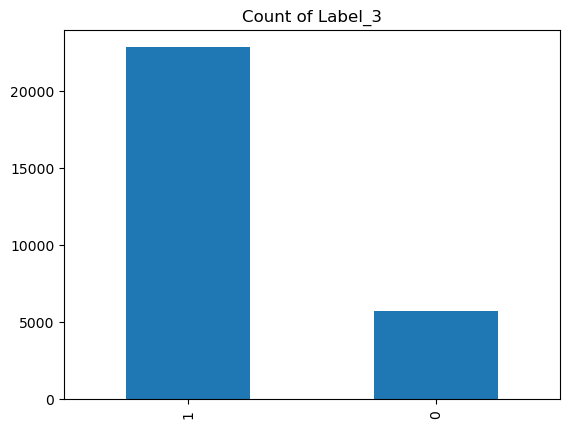

In [43]:
train_data['label_3'].value_counts().plot(kind='bar',title='Count of Label_3')

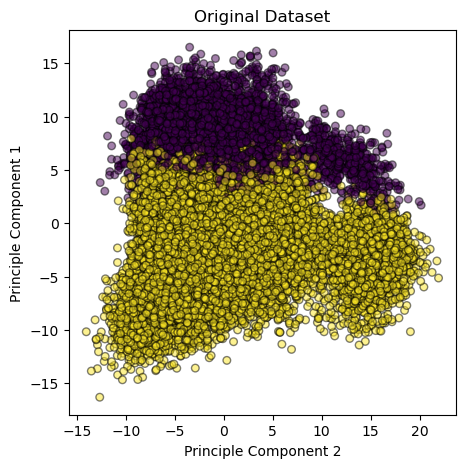

In [44]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(5, 5))
plot_data(X3_train_pca, Y3_train, ax, title='Original Dataset')

(45592, 88)


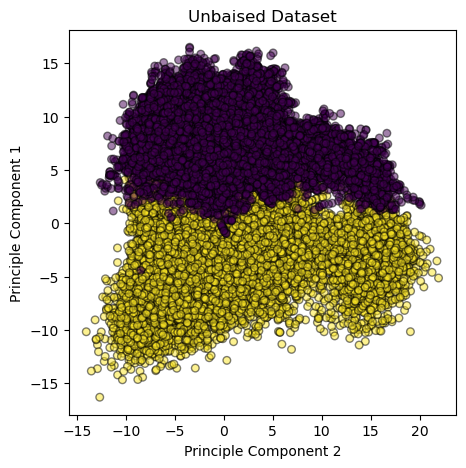

In [45]:
from imblearn.combine import SMOTETomek
# Perform random sampling
smotetomek = SMOTETomek(random_state=0)
X3_train_pca, Y3_train = smotetomek.fit_resample(X3_train_pca, Y3_train)
fig,ax = plt.subplots(figsize=(5, 5))
plot_data(X3_train_pca, Y3_train, ax, title='Unbaised Dataset')
print(X3_train_pca.shape)

<Axes: title={'center': 'Count of Label_3'}>

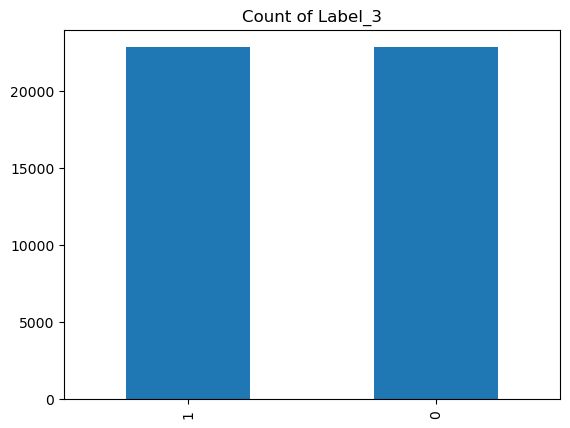

In [46]:
Y3_train.value_counts().plot(kind='bar',title='Count of Label_3')

Label_3 after feater selection using Random Forest

In [47]:
rf = RandomForestClassifier()
rf.fit(X3_train_pca, Y3_train)
Y3_pred_rf = rf.predict(X3_test_pca)
print(classification_report(Y3_test, Y3_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       142
           1       1.00      1.00      1.00       608

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750



In [48]:
importance = rf.feature_importances_
columns_to_delete = []
for i,v in enumerate(importance):
    if v < 0.008:
        columns_to_delete.append(i)   
train_reduced = np.delete(X3_train_pca, columns_to_delete, axis=1)
test_reduced = np.delete(X3_test_pca, columns_to_delete, axis=1)
test_reduced_ = np.delete(X3_test_pca_, columns_to_delete, axis=1)
train_reduced.shape

(45592, 12)

In [49]:
rf = RandomForestClassifier()
rf.fit(train_reduced, Y3_train)
Y3_pred_rf_new = rf.predict(test_reduced)
print(classification_report(Y3_test, Y3_pred_rf_new))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       142
           1       1.00      0.99      1.00       608

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750



In [50]:
Y3_pred_rf_new_ = rf.predict(test_reduced_)

In [51]:
add_to_csv(Y3_pred_rf_,Y3_pred_rf_new_,test_reduced_,'190116U_label_3.csv').head()

,Predicted labels before feature engineering,Predicted labels after feature engineering,No of new features,new_feature_1,new_feature_2,new_feature_3,new_feature_4,new_feature_5,new_feature_6,new_feature_7,new_feature_8,new_feature_9,new_feature_10,new_feature_11,new_feature_12
0,1.0,1.0,12,-2.127144,-7.598202,-4.396460,3.014192,-3.112589,4.888551,1.823607,7.313739,0.548860,4.083836,-1.277841,2.835811
1,1.0,1.0,12,-8.119003,-9.828140,0.191861,10.678703,1.089658,-2.260067,2.925670,-0.941435,7.869434,-0.996620,-2.104872,0.938244
2,1.0,1.0,12,-5.751535,-4.397810,-0.092524,4.298898,3.097758,-0.101781,-0.005172,-3.912220,7.312707,3.742329,-0.384200,4.082985
3,1.0,1.0,12,-2.960283,-7.226763,-0.797357,4.425670,-1.954743,-1.318623,1.232142,3.829918,6.050140,3.904615,1.698920,2.872227
4,1.0,1.0,12,0.440296,-7.139061,1.913627,3.593655,0.181699,2.931932,3.040117,3.156900,7.153125,-2.072948,-1.016763,0.023547


Label 4 classification without feature selection

In [52]:
# Use list comprehension to remove the unwanted column in **usecol**
train_data= pd.read_csv("train.csv", usecols =[i for i in cols if i not in ["label_1", "label_2", "label_3"]])
train_data = train_data.dropna()
train_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,1.007398,-0.317517,-0.148447,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-1.559120,-1.369495,-1.253272,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.136551,-2.210191,-1.463330,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,-0.718073,-2.546477,-2.172275,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.739541,-1.097638,-0.574205,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,6


In [53]:
test_data= pd.read_csv("valid.csv", usecols =[i for i in cols if i not in ["label_1", "label_2", "label_3"]])
test_data = test_data.dropna()
test_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_4
0,-1.153148,-1.038098,1.419872,2.734152,1.154604,-1.086937,-0.516225,-1.370325,2.865359,-1.879877,...,-1.061046,0.382224,0.076990,-0.719046,-1.248530,0.144460,-3.240056,0.052614,0.083108,6
1,-1.377524,-1.018393,1.102352,2.849025,0.440302,-1.149039,-0.789796,-2.258196,1.264268,-2.123730,...,0.120304,-0.066218,-0.231481,-1.383339,-0.787736,1.044895,-2.289637,0.199752,-0.712154,6
2,0.889574,-2.743300,-0.320194,3.047766,-0.923335,1.741686,-0.615148,0.756482,2.074775,-1.433126,...,-1.166126,-1.299070,-2.486144,1.178322,0.035333,0.857712,-1.928684,0.639870,-0.268576,6
3,-1.527213,-1.133121,0.385927,3.129767,0.229020,1.373105,0.919284,-0.755558,1.086973,-2.440614,...,-1.663985,-0.865878,-1.387906,-0.664176,0.805059,0.975368,-2.700269,1.523236,-1.259052,6
4,0.948176,-0.750248,0.008329,1.675338,1.941155,-0.783623,-0.485584,-0.261882,2.875204,-1.473030,...,0.061812,-0.368456,0.344975,-0.665200,-0.428060,-0.393100,-1.854657,2.207063,-0.342725,6


In [54]:
test_data_= pd.read_csv("test.csv", usecols =[i for i in cols if i not in ["label_1", "label_2", "label_3", "label_4"]])
test_data_ = test_data_.dropna()
test_data_.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256
0,-1.141206,-0.279703,1.019681,2.605902,0.460391,-1.167380,-1.149165,-1.205164,2.468966,-2.729526,...,1.670388,-0.355608,-0.342747,-0.102831,-0.868282,-0.429783,0.438561,-1.625122,0.599944,-0.615575
1,-1.796767,-0.056758,0.771219,4.414086,-1.229059,1.732098,0.063241,-0.126311,1.322355,-3.461282,...,1.136570,0.826741,-0.371280,-1.492272,0.227806,0.209200,2.200402,-1.701029,1.163999,-1.570136
2,-1.388968,-0.418296,0.186543,2.803852,-1.499095,1.395180,0.739648,0.274060,1.228789,-3.081147,...,0.343188,-0.243809,0.462302,-1.511495,-0.692679,0.449235,1.377531,-1.854203,-0.040538,-2.164104
3,1.276844,-0.112323,-0.310796,2.251175,0.283670,-0.581020,-0.024439,-0.306097,2.424685,-1.714863,...,3.057573,-0.632902,1.511204,-0.658826,-0.690499,-1.077949,0.930102,-2.758352,-0.246738,-1.389013
4,-1.560815,-0.168494,1.249770,1.869219,-1.646049,0.132156,-0.664602,0.483327,1.728020,-2.258071,...,1.217447,-0.374313,1.280207,-1.546299,-0.510597,1.213396,2.497490,-1.597984,-0.163483,-1.735939


In [55]:
#features
X4_train = train_data.iloc[:,:-1]
Y4_train = train_data.iloc[:,-1]
X4_test = test_data.iloc[:,:-1]
Y4_test = test_data.iloc[:,-1]
X4_test_ = test_data_.iloc[:,:]

Label_4 Using Random Forest

In [56]:
rf = RandomForestClassifier()
rf.fit(X4_train, Y4_train)

Y4_pred_rf = rf.predict(X4_test)
print(classification_report(Y4_test, Y4_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.38      0.55        21
           1       1.00      0.18      0.31        11
           2       1.00      0.48      0.65        27
           3       1.00      0.50      0.67         8
           4       1.00      0.53      0.70        15
           5       1.00      0.82      0.90        11
           6       0.82      1.00      0.90       532
           7       1.00      0.38      0.55        32
           8       1.00      0.26      0.42        19
           9       1.00      0.53      0.69        17
          10       1.00      0.50      0.67        10
          11       1.00      0.73      0.84        11
          12       1.00      0.46      0.63        26
          13       1.00      0.80      0.89        10

    accuracy                           0.85       750
   macro avg       0.99      0.54      0.67       750
weighted avg       0.87      0.85      0.82       750



In [57]:
Y4_pred_rf_ = rf.predict(X4_test_)

Dimension Reduction for Label_4

In [58]:
#Observe correlation between features
X4_train.corr()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256
feature_1,1.000000,-0.122368,-0.043844,0.133359,0.085920,0.143903,0.028939,-0.141357,0.049066,0.180607,...,-0.105048,-0.057641,-0.052484,-0.132177,0.080079,-0.293291,-0.130838,0.213589,-0.029109,-0.046556
feature_2,-0.122368,1.000000,-0.315640,-0.038636,-0.066823,0.014991,0.001485,-0.069789,-0.177971,-0.229639,...,0.011812,0.001762,0.162572,0.052741,-0.097919,0.145376,0.227251,0.142215,0.186345,-0.146253
feature_3,-0.043844,-0.315640,1.000000,0.019540,-0.024949,-0.042450,0.107391,-0.004427,0.133795,0.043577,...,0.039956,-0.030585,-0.196724,0.127026,0.039028,-0.032455,-0.095846,-0.044789,-0.191170,0.045783
feature_4,0.133359,-0.038636,0.019540,1.000000,0.164739,0.342170,-0.033977,-0.120289,0.162836,-0.096058,...,0.110797,0.001961,-0.246270,-0.227987,0.239254,-0.263488,0.018143,0.339311,-0.043473,-0.310500
feature_5,0.085920,-0.066823,-0.024949,0.164739,1.000000,0.165496,-0.277043,-0.086430,0.098080,0.094618,...,-0.158222,-0.093759,-0.205398,0.169982,0.124504,0.046793,0.000250,0.366209,0.250435,0.078442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_252,-0.293291,0.145376,-0.032455,-0.263488,0.046793,0.083610,-0.105217,0.111556,0.021658,-0.135744,...,-0.291179,-0.058649,-0.050666,0.174844,-0.200496,1.000000,0.207554,-0.132150,0.173118,0.401299
feature_253,-0.130838,0.227251,-0.095846,0.018143,0.000250,0.104036,0.169003,0.177270,-0.219734,-0.211072,...,-0.289260,-0.190506,0.017967,0.093282,0.156962,0.207554,1.000000,0.169700,0.031999,-0.146592
feature_254,0.213589,0.142215,-0.044789,0.339311,0.366209,0.244566,-0.191455,0.005285,0.095907,0.091993,...,-0.352404,-0.138879,-0.178728,-0.259972,0.314718,-0.132150,0.169700,1.000000,-0.007740,-0.262347
feature_255,-0.029109,0.186345,-0.191170,-0.043473,0.250435,0.153653,-0.215283,0.025924,-0.093347,-0.103102,...,-0.014113,0.042190,0.107745,0.147976,-0.302310,0.173118,0.031999,-0.007740,1.000000,0.179979


Data Preprocessing

In [59]:
pca = PCA(0.98)
pca = pca.fit(X4_train)

X4_train_pca = pca.transform(X4_train)
X4_test_pca = pca.transform(X4_test)
X4_test_pca_ = pca.transform(X4_test_)
X4_train_pca.shape

(28520, 88)

<Axes: title={'center': 'Count of Label_4'}>

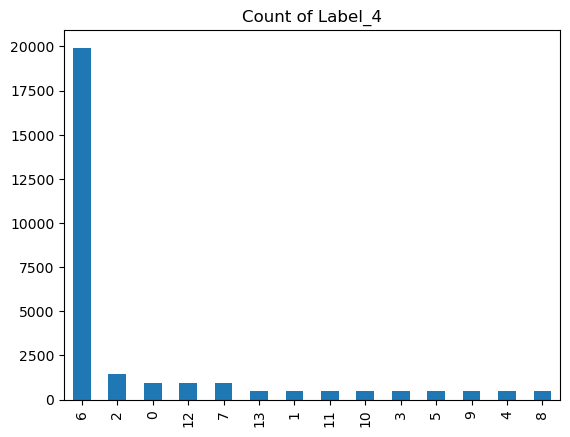

In [60]:
train_data['label_4'].value_counts().plot(kind='bar',title='Count of Label_4')

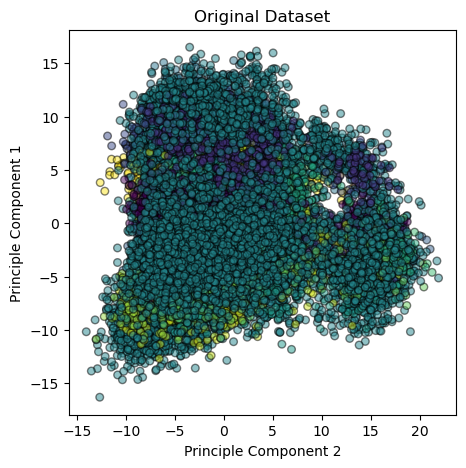

In [61]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_data(X,y,ax,title):
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, s = 30, edgecolor=(0,0,0,0.5))
    ax.set_ylabel('Principle Component 1')
    ax.set_xlabel('Principle Component 2')
    if title is not None:
        ax.set_title(title)
fig,ax = plt.subplots(figsize=(5, 5))
plot_data(X4_train_pca, Y4_train, ax, title='Original Dataset')

oversampling and undersampling

In [62]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


(279132, 88)


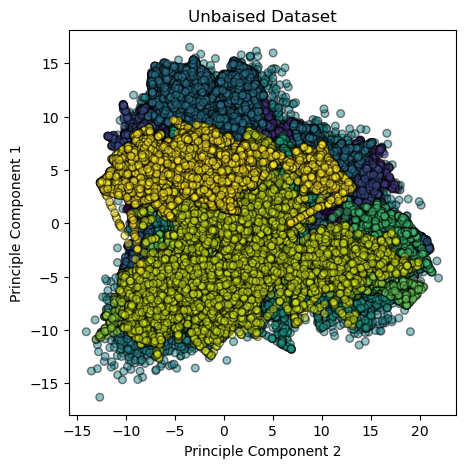

In [63]:
from imblearn.combine import SMOTETomek
# Perform random sampling
smotetomek = SMOTETomek(random_state=0)
X4_train_pca, Y4_train = smotetomek.fit_resample(X4_train_pca, Y4_train)
fig,ax = plt.subplots(figsize=(5, 5))
plot_data(X4_train_pca, Y4_train, ax, title='Unbaised Dataset')
print(X4_train_pca.shape)

<Axes: title={'center': 'Count of Label_4'}>

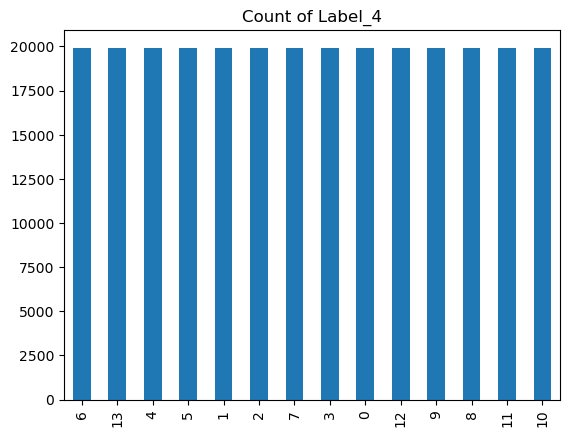

In [64]:
Y4_train.value_counts().plot(kind='bar',title='Count of Label_4')

Label_4 after feater selection using Random Forest

In [65]:
rf = RandomForestClassifier()
rf.fit(X4_train_pca, Y4_train)
Y4_pred_rf = rf.predict(X4_test_pca)
print(classification_report(Y4_test, Y4_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       1.00      0.73      0.84        11
           2       1.00      0.85      0.92        27
           3       1.00      1.00      1.00         8
           4       1.00      0.80      0.89        15
           5       1.00      0.91      0.95        11
           6       0.95      1.00      0.97       532
           7       1.00      0.91      0.95        32
           8       1.00      0.63      0.77        19
           9       1.00      1.00      1.00        17
          10       1.00      0.90      0.95        10
          11       1.00      1.00      1.00        11
          12       1.00      0.73      0.84        26
          13       1.00      1.00      1.00        10

    accuracy                           0.96       750
   macro avg       1.00      0.89      0.93       750
weighted avg       0.96      0.96      0.96       750



In [66]:
importance = rf.feature_importances_
columns_to_delete = []
for i,v in enumerate(importance):
    if v < 0.008:
        columns_to_delete.append(i)   
train_reduced = np.delete(X4_train_pca, columns_to_delete, axis=1)
test_reduced = np.delete(X4_test_pca, columns_to_delete, axis=1)
test_reduced_ = np.delete(X4_test_pca_, columns_to_delete, axis=1)
train_reduced.shape

(279132, 40)

In [67]:
rf = RandomForestClassifier()
rf.fit(train_reduced, Y4_train)
Y4_pred_rf_new = rf.predict(test_reduced)
print(classification_report(Y4_test, Y4_pred_rf_new))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84        21
           1       1.00      0.82      0.90        11
           2       1.00      0.89      0.94        27
           3       1.00      1.00      1.00         8
           4       1.00      0.87      0.93        15
           5       1.00      0.91      0.95        11
           6       0.95      1.00      0.97       532
           7       1.00      0.88      0.93        32
           8       1.00      0.68      0.81        19
           9       1.00      0.94      0.97        17
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        11
          12       1.00      0.81      0.89        26
          13       1.00      1.00      1.00        10

    accuracy                           0.96       750
   macro avg       0.99      0.90      0.94       750
weighted avg       0.96      0.96      0.96       750



In [68]:
Y4_pred_rf_new_ = rf.predict(test_reduced_)

In [69]:
add_to_csv(Y4_pred_rf_,Y4_pred_rf_new_,test_reduced_,'190116U_label_4.csv').head()

,Predicted labels before feature engineering,Predicted labels after feature engineering,No of new features,new_feature_1,new_feature_2,new_feature_3,new_feature_4,new_feature_5,new_feature_6,new_feature_7,...,new_feature_31,new_feature_32,new_feature_33,new_feature_34,new_feature_35,new_feature_36,new_feature_37,new_feature_38,new_feature_39,new_feature_40
0,6.0,6.0,40,-2.127144,-7.598202,-4.396460,-6.646038,3.014192,-3.112589,4.888551,...,2.914364,-1.847985,-0.827303,2.824331,0.439596,1.121505,-1.109871,0.811149,-0.722229,2.064405
1,6.0,6.0,40,-8.119003,-9.828140,0.191861,-7.562776,10.678703,1.089658,-2.260067,...,0.248404,-1.070253,-1.480438,0.478576,1.788080,-0.351597,0.245233,-0.859099,0.872419,-0.885390
2,6.0,6.0,40,-5.751535,-4.397810,-0.092524,-4.446784,4.298898,3.097758,-0.101781,...,-1.439556,-1.143912,-1.524720,0.709687,-0.498976,-0.881848,-0.741997,-0.105421,-0.758091,-0.332213
3,6.0,6.0,40,-2.960283,-7.226763,-0.797357,3.202733,4.425670,-1.954743,-1.318623,...,-1.928245,-1.041204,-1.617200,-0.747099,-1.341471,-0.710634,1.403205,1.546756,0.482693,-1.614969
4,6.0,6.0,40,0.440296,-7.139061,1.913627,-4.046085,3.593655,0.181699,2.931932,...,1.372404,-0.266374,-0.529726,0.017725,-1.439198,-1.183275,-0.770936,-0.628630,-0.214113,-1.440968
